# <i class="fa-solid fa-dumbbell"></i> Exercises

Please fill the missing code pieces as indicated by the `...`. The imports are always provided at the top of the code chunks. This should give you a hint for which functions/classes to use.

## Exercise 1: Model Selection

Today we are working with the `California Housing dataset`, which you are already familiar with, as we previously used it while exploring resampling method.
This dataset is based on the 1990 U.S. Census and includes features describing California districts. 

1) Familiarize yourself with the data
    - What kind of features are in the dataset? What is the target?

In [8]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

2) Baseline model 
    - Create a baseline linear regression model using **all** features and evaluate the model through 5-fold cross validation, using R² as the performance metric
    - Print the individual and average R²

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Regression model
model = ...
scores = ...

# Print the results
print("R² scores from each fold:", scores)
print("Average R² score:", np.mean(scores))

R² scores from each fold: Ellipsis


TypeError: unsupported operand type(s) for /: 'ellipsis' and 'int'

3) Apply a forward stepwise selection to find a simpler suitable model.
    - Split the data into 80% training data and 20% testing data (print the shape to confirm it was sucessful)
    - Perform a forward stepwise selection with a linear regression model, 5-fold CV, R² score, and `parsimonious` feature selection (refer to [documentation](https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/) for further information)
    - Print the best CV R² as well as the chosen features

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = ...

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Forward Sequential Feature Selector
sfs_forward = ...

sfs_forward.fit(...)

print(f">> Forward SFS:")
print(f"   Best CV R²      : {sfs_forward.k_score_:.3f}")
print(f"   Optimal # feats : {len(sfs_forward.k_feature_idx_)}")
print(f"   Feature names   : {sfs_forward.k_feature_names_}")

4) Evaluate the model on the test set

In [ ]:
selected_features = list(sfs_forward.k_feature_names_)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train and evaluate
model.fit(...)
test_r2 = model.score(...)
print(f"Test R² for the sfs model: {test_r2:.4f}")

## Exercise 2: LASSO

Please implement a Lasso regression model similar to the Ridge model in the [Regularization](2_Regularization) section.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# Data related processing
hitters = sm.datasets.get_rdataset("Hitters", "ISLR").data
hitters_subset = hitters[["Salary", "AtBat", "Runs","RBI", "CHits", "CAtBat", "CRuns", "CWalks", "Assists", "Hits", "HmRun", "Years", "Errors", "Walks"]].copy()
hitters_subset = hitters_subset.drop(columns=["CRuns", "CAtBat"]) # Remove highly correlated features (see previous session)
hitters_subset.dropna(inplace=True) # drop rows containing missing data

y = hitters_subset["Salary"]
X = hitters_subset.drop(columns=["Salary"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale predictors to mean=0 and std=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TODO: Implement Lasso 
...

## Exercise 3: GAMs (1)

Objective: Understand how the number of basis functions (df) and the polynomial degree (degree) affect the flexibility of a spline and the resulting fit in a Generalized Additive Model.

1. Use the diabetes dataset and focus on the relationship between `bmi` and `target`.
2. We want to test different combinations of parameters. For the dfs, please use 4, 6, 12. For the degree, please use 2 and 3 (quadratic and cubic).
3. Fit the GAMs for each parameter combination. The resulting models will be plotted automatically for visual comparison.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from statsmodels.gam.api import GLMGam, BSplines


# TODO: 1. Get bmi as x and the target as y
data = load_diabetes(as_frame=True)
x = ...
y = ...

# TODO: 2. Define possible parameters
df_values = ...
degree_values = ...

# TODO: 3. Plot partial effect for each combination of df and degree
fig, axes = plt.subplots(len(df_values), len(degree_values), figsize=(15, 10), sharey=True)

for i, df_val in enumerate(df_values):
    for j, deg_val in enumerate(degree_values):
        bs = BSplines(...)
        gam = GLMGam(...)
        res = gam.fit()

        res.plot_partial(0, cpr=True, ax=axes[i, j])
        axes[i, j].set_title(f'B-spline: df={df_val}, degree={deg_val}')
        axes[i, j].set_xlabel('BMI')
        axes[i, j].set_ylabel('Effect')

plt.tight_layout()
plt.show()

## Exercise 4: GAMs (2)

We now use the [wage](https://islp.readthedocs.io/en/latest/datasets/Wage.html) dataset, which contains income information for a group of workers, along with demographic and employment-related features such as age, education, marital status, and job class.

1) Explore the dataset
    - Which variables are numeric?
    - Which ones are categorical?

2) Fit a GAM predicting `wage` from `age`, `year`, `education`, `jobclass`, and `maritl`

Note: For categorical features we use a one-hot encoding with `pd.get_dummies()`

In [ ]:
import pandas as pd
from ISLP import load_data
from statsmodels.gam.api import GLMGam, BSplines

# Load data
Wage = load_data('Wage')

# Continuous features
smoooth_features = ...
X_spline = Wage[smoooth_features]

# Categorical features — one-hot encode
categoricals = ...
X_cat = pd.get_dummies(Wage[categoricals], drop_first=True)

# Outcome
y = ...

# Create BSpline basis
bs = BSplines(...)

# Fit GAM
gam = GLMGam(...)
res = gam.fit()

print(res.summary())

## Exercise 5: KNN

You will implement a K-Nearest Neighbours (KNN) classifier to predict whether a patient is likely to have malignant or benign breast cancer based on several features. The data is already loaded for you, but please have a look a the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) to quickly refresh you memory about the dataset.

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the data
data = load_breast_cancer()
X, y = data.data, data.target

# Create a DataFrame for easier inspection and manipulation
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df

Please implement the following:

1. Subset the dataframe to use `mean area`, `mean radius`, and `mean smoothness` as features (X), and `target` as the target (y)
2. Scale the predictors to mean 0 and variance 1
3. Split the data into a training and a testing set (70/30)
4. Train a kNN classifier with $k=5$
5. Evaluate the performance for the testing set. Please use the `accuracy_score()` as well as the `classification_report()` function.

In [ ]:
# TODO: 1. Select features and target
X = ...
y = ...

# TODO: 2. Scale the features
scaler = ...
X_scaled = ...

# TODO: 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(...)

# 4. Perform KNN classification
knn = KNeighborsClassifier(...)
knn.fit(...)

# TODO: 5. Get predictions
y_pred = knn.predict(...)

print("Accuracy:", accuracy_score(...))
print("\nClassification Report:\n", classification_report(...))

The classification model from the previous step has two main limitations:

1. It is trained and evaluated on a single data split
2. It uses a single $k$ even though we do not know if it is optimal

Please do the following:

1. Implement 5-fold cross validation
2. Train models for $k$ ranging from 1 to 200 and plot the mean accuracy over all folds

In [ ]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set_theme(style="whitegrid")

k_values = range(1, 200)
mean_accuracies = []

# 5-fold cross-validation for different k values
for k in k_values:
    knn = KNeighborsClassifier(...)
    scores = cross_val_score(...)
    mean_accuracies.append(...)

# Plot
fig, ax = plt.subplots()

sns.lineplot(x=..., y=..., linestyle='-', ax=ax)
ax.set(xlabel=..., ylabel=..., title=...);

Discuss the results. How is the performance in general? Which $k$ would you chose?

## Exercise 6: LDA, QDA & Naïve Bayes

Once again, we will use the Iris dataset for classificationa analysis. Your task is to compare the performance of LDA, QDA, and Gaussian Naïve Bayes!

1. Load the `iris` dataset from `sklearn.datasets`. We will use only the first two features (sepal length and width)
2. Split the data into training and test sets
3. Fit LDA, QDA, and Naïve Bayes classifiers to the training data
4. Print the classification report for all models on the test data
5. Plot the decision boundaries for both models

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

# 1. Load data
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
target_names = iris.target_names

# 2. TODO Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [17]:
# 3. TODO: Fit LDA model and print classification report
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print(classification_report(y_test, lda.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.67      0.65        15
           2       0.64      0.60      0.62        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45



In [18]:
# 3. TODO: Fit QDA model and print classification report
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

print(classification_report(y_test, qda.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.56      0.60      0.58        15
           2       0.57      0.53      0.55        15

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45



In [19]:
# 3. TODO: Fit Naive Bayes model and print classification report
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.56      0.60      0.58        15
           2       0.54      0.47      0.50        15

    accuracy                           0.69        45
   macro avg       0.68      0.69      0.68        45
weighted avg       0.68      0.69      0.68        45



Once you have trained all three models, you can simply run the following code to plot the decision boundaries:

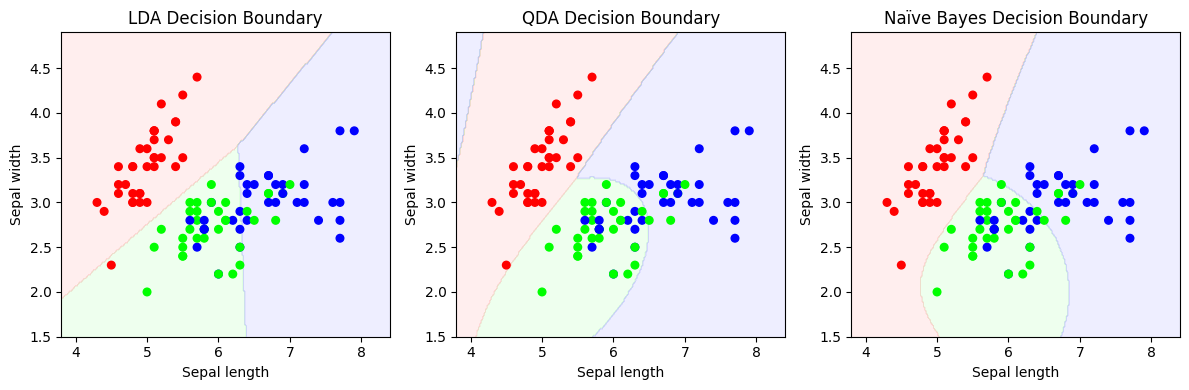

In [26]:
# 4. Plot decision boundaries for all 3 classifiers

# Plotting function
def plot_decision_boundary(model, X, y, title, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=30)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')

# Create plots for all 3 classifiers
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plot_decision_boundary(lda, X_train, y_train, "LDA Decision Boundary", axes[0])
plot_decision_boundary(qda, X_train, y_train, "QDA Decision Boundary", axes[1])
plot_decision_boundary(gnb, X_train, y_train, "Naïve Bayes Decision Boundary", axes[2])
plt.tight_layout()